In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-17b

In [3]:
df = pd.read_csv("WASP_17b_literature.csv")#, header=None)
df = df.set_index('Parameter')
df = df.drop(columns=df.columns[0])


In [4]:
df

,Patel & Espinoza 2022,Ivshina & Winn 2022,Bonomo et al. 2017,Barstow et al. 2017,Sedaghati et al. 2016,Sing et al. 2016,Knutson et al. 2014,Southworth et al. 2012,Anderson et al. 2011,Triaud et al. 2010,Anderson et al. 2010,ExoFOP-TESS TOI,Alderson et al. 2022
Parameter,,,,,,,,,,,,,
e,---,---,0.020,---,0,---,0.039+0.050-0.027,0,0.028+0.015-0.018,0.11,0.129+0.106-0.068,---,---
i,---,---,86.83+0.68-0.53,---,87.06+0.61-0.63,---,---,86.71+/-0.30,86.83+0.68-0.56,86.63+0.39-0.45,87.8+2.0-1.0,---,---
P,3.7354300+0.0000071-0.0000074,3.7354826+/-0.0000015,3.7354845+/-0.0000019,---,3.735438,3.73,---,3.7354845+/-0.0000019,3.7354380+/-0.0000068,3.7354330+0.0000076-0.0000075,3.7354417+0.0000072-0.0000073,3.7354838+/-0.0000021,3.73548546+/-0.00000027
R,---,---,1.991+/-0.081,---,1.747+/-0.078,1.89,---,1.932+/-0.053,1.991+/-0.081,1.986+0.089-0.074,1.74+0.26-0.23,1.894151+/-0.106681,---
a,---,---,0.05151+/-0.00035,---,0.0513+/-0.0029,---,---,0.05125+/-0.00103,0.05150+/-0.00034,0.0500+/-0.0017,0.051+0.0017-0.0018,---,---
T_c,2458638.33209+/-0.00026,2457192.70049+/-0.00089,2454592.80154+/-0.00005,---,2457192.69798+/-0.00028,---,---,2454592.80154+/-0.00050,2454577.85806+/-0.00027,2454559.18096+0.00025-0.00021,2454559.18102+/-0.00028,2459355.5456300+/-0.0002571,---
b,0.180+0.130-0.100,---,---,---,0.361+/-0.069,---,---,---,0.401+0.059-0.077,0.400+0.043-0.040,---,---,---
RpRs,0.1218+0.0016-0.0014,---,---,---,0.12345+/-0.00109,---,---,0.1255+/-0.0007,---,0.12929+0.00077-0.00061,---,---,---
delta,---,---,---,---,---,---,---,---,1.696+/-0.026,1.672+0.020-0.016,1.672+0.029-0.035,1.7030000000+/-0.0000271732,---


In [5]:
df_ref_list = df.columns

df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
df_T_c_list = df.loc['T_c']
df_transit_duration_list = df.loc['transit_duration']

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)


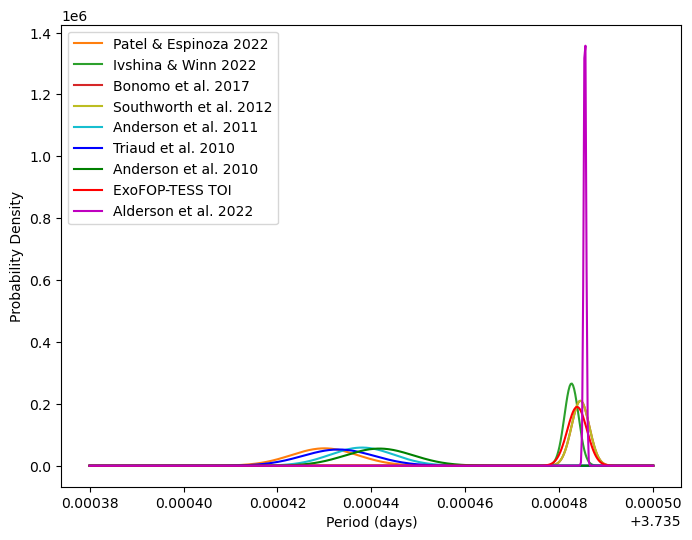

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.73538, 3.7355, 500)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

#Same graph seen in https://doi.org/10.1093/mnras/stac661

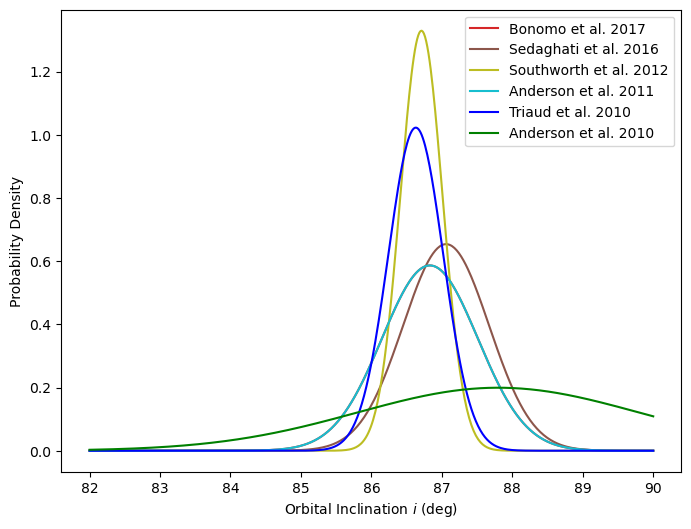

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(82, 90, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital Inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

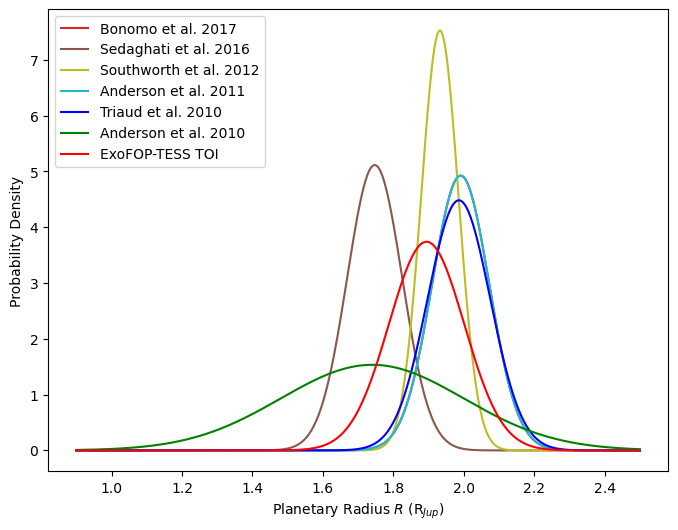

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.9, 2.5, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planetary Radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

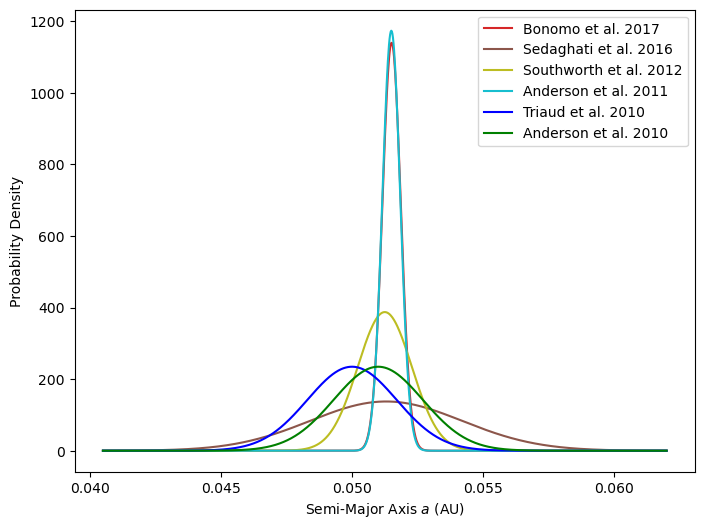

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0405, 0.062, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Semi-Major Axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

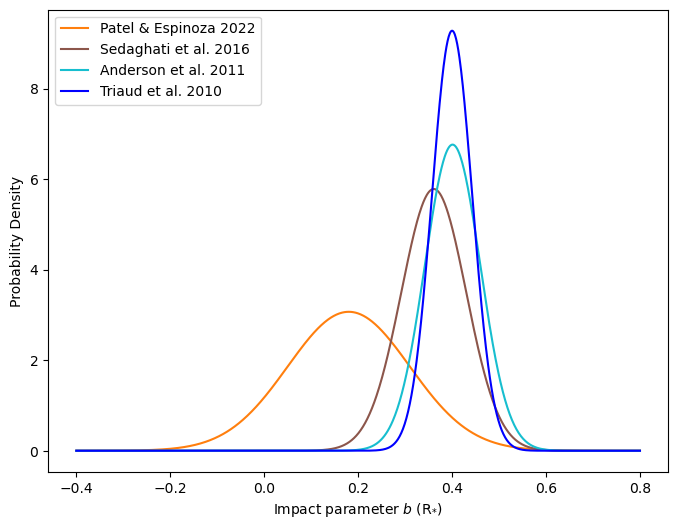

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(-0.4, 0.8, 1000)
for b_obj, author in zip(b_list, b_ref_list):
    mu, upper, lower = b_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Impact parameter $b$ (R$_{*}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

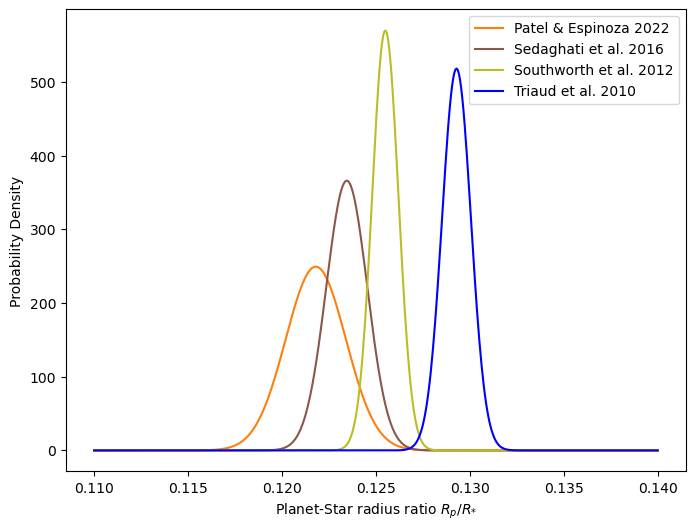

In [11]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.11, 0.14, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

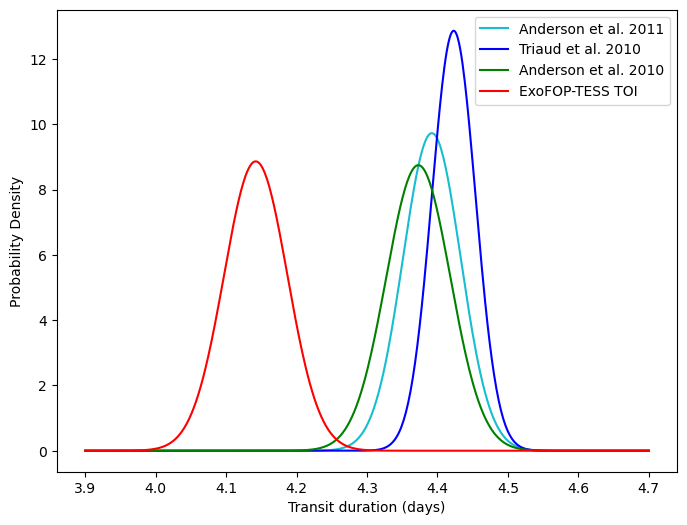

In [12]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.9, 4.7, 500)
for transit_duration_obj, author in zip(transit_duration_list, transit_duration_ref_list):
    mu, upper, lower = transit_duration_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Transit duration (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()